In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(1)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df_ = pd.read_csv('AirlineTweets.csv')

In [3]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df = df_[['airline_sentiment', 'text']].copy()

In [5]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<AxesSubplot: >

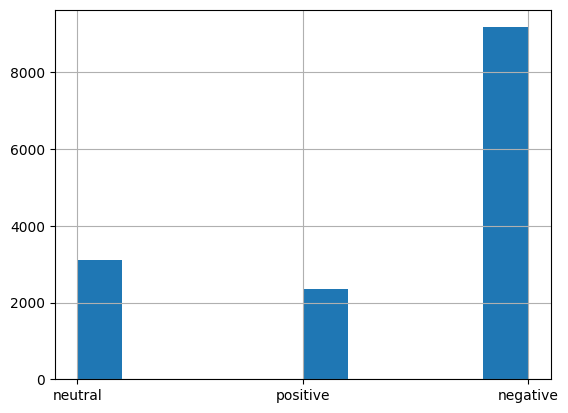

In [6]:
df['airline_sentiment'].hist()

In [7]:
target_map = {'positive': 1, 'negative': 0, 'neutral': 2}
df['target'] = df['airline_sentiment'].map(target_map)

In [8]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [9]:
df_train, df_test, = train_test_split(df)

In [10]:
df_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [16]:
vectorizer = TfidfVectorizer(max_features=2000)

In [18]:
X_train = vectorizer.fit_transform(df_train['text'])
# X_train.shape
X_test = vectorizer.transform(df_test['text'])

In [19]:
Y_train = df_train['target']
Y_test = df_test['target']

In [20]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print('Train acc: ', model.score(X_train, Y_train))
print("Test  acc: ", model.score(X_test, Y_test))

Train acc:  0.854735883424408
Test  acc:  0.7991803278688525


In [21]:
Pr_train = model.predict_proba(X_train)
Pr_test = model.predict_proba(X_test)
print("Train AUC: ", roc_auc_score(Y_train, Pr_train, multi_class='ovo'))
print("Test  AUC: ", roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

Train AUC:  0.9430998407205663
Test  AUC:  0.8953978171753848


In [22]:
P_train = model.predict(X_train)
P_test  = model.predict(X_test) 

In [23]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.96486133, 0.00813126, 0.02700741],
       [0.19966063, 0.69966063, 0.10067873],
       [0.30193548, 0.0516129 , 0.64645161]])

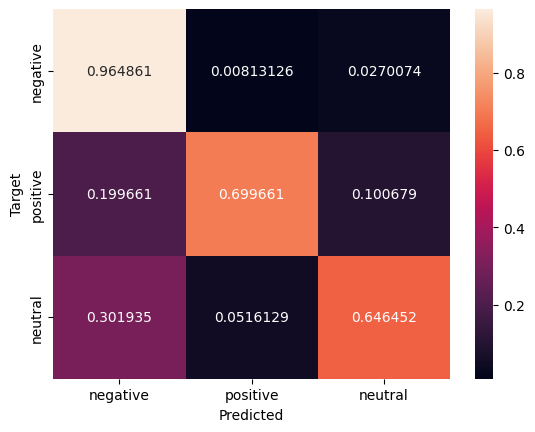

In [24]:
def plot_cm(cm):
    classes = ['negative', 'positive', 'neutral']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel('Predicted')
    ax.set_ylabel("Target")

plot_cm(cm)

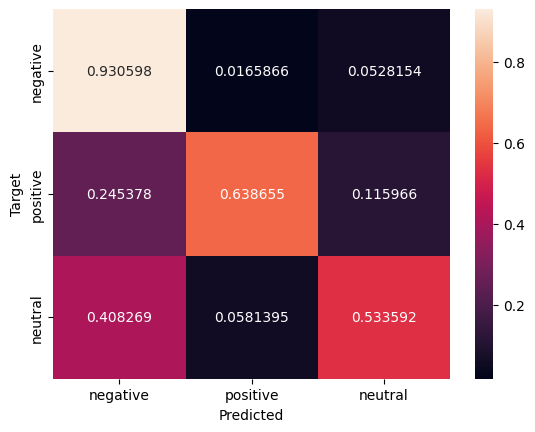

In [25]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)